In [137]:
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# importer la base de données de test
db =pd.read_csv('dataForRegression.csv', sep=";" ,encoding = "ISO-8859-1")

db=db.stack().str.replace(',','.').unstack()

db=db.drop(['Date/Heure'],axis=1)
db=db.iloc[1:] # supprimer la ligne des unités
db.iloc[:,:] = db.iloc[:,:].astype(float)




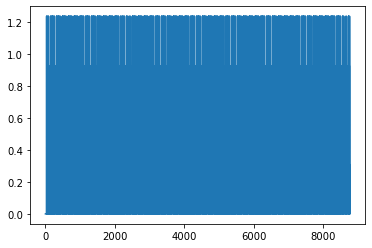

In [138]:
plt.plot(db["Informatiques + Equip."])

In [139]:
X=db[["Température Sèche Air Extérieur","Température d'air","Apports solaires Fenêtres extérieures"]].values
y=db[["Informatiques + Equip."]].values*16/float(db[["Informatiques + Equip."]].max())
X1=X.copy()
X = X[0:168*1][:]
y=y[0:168*1]

#print(train.shape, test.shape)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [140]:
len(y)

168

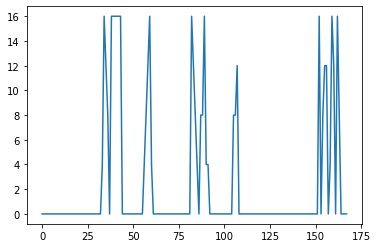

In [141]:
plt.plot(y[0:168])

In [142]:
X

array([[ 1.775000e+00,  5.397896e+00,  0.000000e+00],
       [-1.575000e+00,  4.757328e+00,  0.000000e+00],
       [-2.825000e+00,  4.539480e+00,  0.000000e+00],
       [-3.475000e+00,  4.372006e+00,  0.000000e+00],
       [-3.675000e+00,  4.266765e+00,  0.000000e+00],
       [-3.775000e+00,  4.181348e+00,  0.000000e+00],
       [-3.200000e+00,  4.163240e+00,  0.000000e+00],
       [-2.250000e+00,  4.204284e+00,  0.000000e+00],
       [-1.250000e+00,  4.264638e+00,  3.810000e-03],
       [-2.500000e-02,  4.378387e+00,  2.630000e-02],
       [ 8.250000e-01,  4.510667e+00,  6.968670e-02],
       [ 1.750000e+00,  4.665245e+00,  1.053962e-01],
       [ 2.075000e+00,  4.772187e+00,  1.238874e-01],
       [ 2.025000e+00,  4.793941e+00,  1.222022e-01],
       [ 2.750000e+00,  4.880932e+00,  1.002218e-01],
       [ 3.900000e+00,  5.053336e+00,  6.060000e-02],
       [ 4.800000e+00,  5.183263e+00,  2.080000e-02],
       [ 5.000000e+00,  5.203497e+00,  0.000000e+00],
       [ 9.275000e+00,  5.62

In [143]:
y.max()

16.0

In [144]:
# Create train/test
X_train, X_test, y_train, y_test = train_test_split(    
    X_sc, y, test_size=0.25, random_state=42)

In [145]:
a,b,c=128,64,32
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(a, input_dim=X.shape[1], activation='relu')) # Hidden 1
model.add(Dense(b, activation='relu')) # Hidden 2
model.add(Dense(c, activation='relu')) # Hidden 3


model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)


In [146]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
4/4 - 1s - loss: 30.9073 - val_loss: 23.4663
Epoch 2/1000
4/4 - 0s - loss: 29.1218 - val_loss: 22.2979
Epoch 3/1000
4/4 - 0s - loss: 27.5285 - val_loss: 21.0261
Epoch 4/1000
4/4 - 0s - loss: 25.6706 - val_loss: 19.6989
Epoch 5/1000
4/4 - 0s - loss: 23.9314 - val_loss: 18.2869
Epoch 6/1000
4/4 - 0s - loss: 22.0051 - val_loss: 16.8032
Epoch 7/1000
4/4 - 0s - loss: 19.2626 - val_loss: 15.4342
Epoch 8/1000
4/4 - 0s - loss: 16.9209 - val_loss: 14.1298
Epoch 9/1000
4/4 - 0s - loss: 14.5484 - val_loss: 12.9568
Epoch 10/1000
4/4 - 0s - loss: 11.7338 - val_loss: 12.2006
Epoch 11/1000
4/4 - 0s - loss: 10.3537 - val_loss: 11.9131
Epoch 12/1000
4/4 - 0s - loss: 8.3045 - val_loss: 11.8390
Epoch 13/1000
4/4 - 0s - loss: 6.7499 - val_loss: 11.5114
Epoch 14/1000
4/4 - 0s - loss: 5.8276 - val_loss: 10.6149
Epoch 15/1000
4/4 - 0s - loss: 5.0129 - val_loss: 9.1216
Epoch 16/1000
4/4 - 0s - loss: 4.1725 - val_loss: 7.4586
Epoch 17/1000
4/4 - 0s - loss: 3.7324 - val_loss: 6.0842
Epoch 18/1000
4

In [147]:
from sklearn import metrics

# Predict
y_pred = model.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(y_pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 4.1156657351278225


In [148]:
import numpy as np

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 2.028710362552482


In [149]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

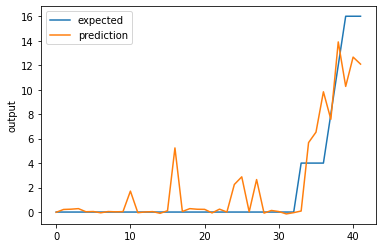

In [150]:

# Plot the chart
chart_regression(y_pred.flatten(),y_test)

In [151]:
y_pred.flatten()

array([-1.9863900e-02,  2.1907765e-01, -7.0159458e-02,  2.3559973e-01,
        4.8540533e-06,  2.2523689e+00,  2.8781538e+00,  1.9992776e-02,
        7.5808764e+00,  9.8260365e+00,  1.2865913e-01,  1.3901262e+01,
        3.8966291e-02, -1.5291917e-01, -4.8888139e-02,  5.6750941e+00,
        2.2851762e-01,  2.6540103e+00,  4.5783557e-02,  5.2392311e+00,
        2.7880698e-01,  2.1161723e-01,  2.3332137e-01,  2.7959538e-01,
        2.4603257e-02,  4.2382766e-02,  1.0266975e+01, -6.1679982e-02,
        4.0536784e-02,  1.8813916e-02,  1.2088529e+01,  8.3293699e-02,
        3.3483781e-02,  1.7097192e+00, -5.3018875e-02,  8.3078593e-03,
        3.4887843e-02, -1.0325972e-01,  1.0677611e-01,  1.2662843e+01,
        6.5289674e+00, -8.5907422e-02], dtype=float32)

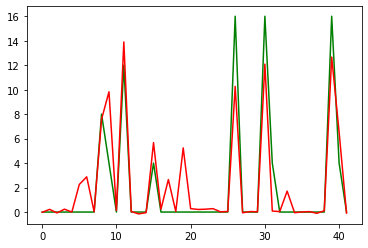

In [152]:
plt.plot(y_test[0:168],color="green")
plt.plot(y_pred[0:168],color="red")

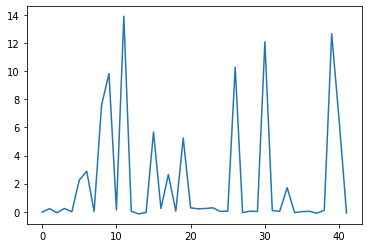

In [153]:
plt.plot(y_pred)

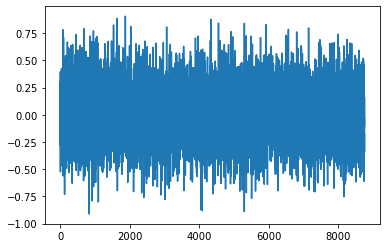

In [154]:
import numpy as np 
mu, sigma = 0, 0.25
# creating a noise with the same dimension as the dataset X_test 
noise = np.random.normal(mu, sigma, len(X1)) 
plt.plot(noise)


In [155]:
X1[:,1]=X1[:,1]+noise
X1

array([[ 1.775     ,  5.56052318,  0.        ],
       [-1.575     ,  4.69455957,  0.        ],
       [-2.825     ,  4.50852305,  0.        ],
       ...,
       [ 5.35      , 17.79708401,  0.        ],
       [ 3.975     , 16.18218089,  0.        ],
       [ 2.175     , 15.71231937,  0.        ]])

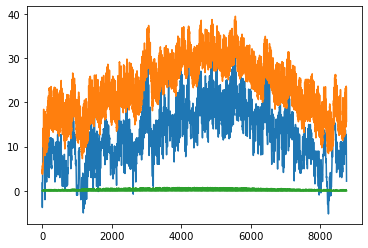

In [156]:
scaler = StandardScaler()
noise = scaler.fit_transform(X1)
plt.plot(X1)

In [157]:
X.std()

5.169539528976471

In [158]:
0.5/20

0.025